In [1]:
from itertools import count
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchinfo
from torch import nn
from torchlake.common.utils.convert import img_tensor_to_np
from torchlake.reinforcement_learning.controller.trainer_dqn import DqnTrainer
from torchlake.reinforcement_learning.datasets.atari import AtariDataset
from torchlake.reinforcement_learning.models import Dqn
from torchvision import transforms

# Setting

In [2]:
artifacts_path = Path("../../artifacts/dqn")

In [3]:
BATCH_SIZE = 64 # the larger, the longer cold start
device = torch.device('cuda:0')

# Data

In [4]:
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200 # every 200 actions, then lower random action prob
CAPACITY = 1500 # store 1500 memory
TIMEOUT = 300

In [5]:
preprocess = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.Grayscale(),
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
    ]
)

In [6]:
train_dataset = AtariDataset("ALE/DemonAttack-v5", CAPACITY, BATCH_SIZE, preprocess)

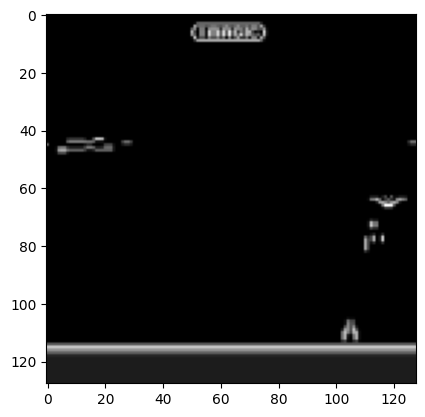

In [25]:
plt.imshow(img_tensor_to_np(train_dataset[0]), cmap='gray')

# model

In [8]:
model = Dqn(train_dataset.n_actions, device).to(device)

In [9]:
torchinfo.summary(model)

Layer (type:depth-idx)                   Param #
Dqn                                      --
├─QNetwork: 1-1                          --
│    └─ConvBnRelu: 2-1                   --
│    │    └─Conv2d: 3-1                  1,024
│    │    └─BatchNorm2d: 3-2             32
│    │    └─ReLU: 3-3                    --
│    └─ConvBnRelu: 2-2                   --
│    │    └─Conv2d: 3-4                  8,192
│    │    └─BatchNorm2d: 3-5             64
│    │    └─ReLU: 3-6                    --
│    └─Sequential: 2-3                   --
│    │    └─Linear: 3-7                  1,605,888
│    │    └─ReLU: 3-8                    --
│    │    └─Linear: 3-9                  1,542
Total params: 1,616,742
Trainable params: 1,616,742
Non-trainable params: 0

# train

In [10]:
EPOCHS = 100
GAMMA = 0.9
EPS_0 = 0.9
EPS_T = 0.05
EPS_DECAY = 0.05
TARGET_UPDATE = 10

In [11]:
trainer = DqnTrainer(
    EPOCHS,
    device,
    train_dataset.n_actions,
    TIMEOUT,
    GAMMA,
    TARGET_UPDATE,
    EPS_0,
    EPS_T,
    EPS_DECAY,
)

In [12]:
optimizer = torch.optim.SGD(trainer.policy_net.parameters(), lr=1e-3)
criterion = nn.MSELoss()

In [13]:
training_loss, episode_rewards = trainer.run(
    train_dataset,
    model,
    optimizer,
    criterion,
)

  1%|          | 1/100 [00:02<04:39,  2.82s/it]

epoch 0 : 0.7080011077386101


  2%|▏         | 2/100 [00:05<04:16,  2.62s/it]

epoch 1 : 0.4935262830699005


  3%|▎         | 3/100 [00:07<04:15,  2.63s/it]

epoch 2 : 0.3103747293353081


  4%|▍         | 4/100 [00:10<04:07,  2.58s/it]

epoch 3 : 0.46629748748386424


  5%|▌         | 5/100 [00:12<03:38,  2.30s/it]

epoch 4 : 0.49043299321014927


  6%|▌         | 6/100 [00:14<03:42,  2.36s/it]

epoch 5 : 0.5546414661298559


  7%|▋         | 7/100 [00:17<03:57,  2.56s/it]

epoch 6 : 0.600207175849086


  8%|▊         | 8/100 [00:20<04:14,  2.77s/it]

epoch 7 : 0.5997385463346279


  9%|▉         | 9/100 [00:23<04:10,  2.75s/it]

epoch 8 : 0.6291648726724707


 10%|█         | 10/100 [00:26<04:03,  2.71s/it]

epoch 9 : 0.6136610714898157


 11%|█         | 11/100 [00:28<03:54,  2.64s/it]

epoch 10 : 0.6009438194309754


 12%|█▏        | 12/100 [00:31<03:58,  2.71s/it]

epoch 11 : 0.5490151542266738


 13%|█▎        | 13/100 [00:34<03:51,  2.66s/it]

epoch 12 : 0.46010955588960173


 14%|█▍        | 14/100 [00:36<03:45,  2.63s/it]

epoch 13 : 0.5150764607808914


 15%|█▌        | 15/100 [00:39<03:40,  2.59s/it]

epoch 14 : 0.5304629873001694


 16%|█▌        | 16/100 [00:41<03:35,  2.56s/it]

epoch 15 : 0.5747702242528085


 17%|█▋        | 17/100 [00:44<03:37,  2.62s/it]

epoch 16 : 0.490633274481146


 18%|█▊        | 18/100 [00:47<03:36,  2.64s/it]

epoch 17 : 0.44068351680060164


 19%|█▉        | 19/100 [00:49<03:31,  2.62s/it]

epoch 18 : 0.44057635938210343


 20%|██        | 20/100 [00:52<03:27,  2.60s/it]

epoch 19 : 0.434518493340657


 21%|██        | 21/100 [00:54<03:23,  2.57s/it]

epoch 20 : 0.4553051626068413


 22%|██▏       | 22/100 [00:57<03:19,  2.56s/it]

epoch 21 : 0.4687583370264186


 23%|██▎       | 23/100 [00:59<03:19,  2.59s/it]

epoch 22 : 0.409022500101118


 24%|██▍       | 24/100 [01:02<03:16,  2.59s/it]

epoch 23 : 0.44763080493556306


 25%|██▌       | 25/100 [01:05<03:16,  2.62s/it]

epoch 24 : 0.4741286496040829


 26%|██▌       | 26/100 [01:07<03:12,  2.60s/it]

epoch 25 : 0.38556611493378384


 27%|██▋       | 27/100 [01:10<03:08,  2.58s/it]

epoch 26 : 0.6345223953013008


 28%|██▊       | 28/100 [01:12<03:04,  2.57s/it]

epoch 27 : 0.5673946811758799


 29%|██▉       | 29/100 [01:15<03:04,  2.60s/it]

epoch 28 : 0.4136218179846523


 30%|███       | 30/100 [01:18<03:04,  2.64s/it]

epoch 29 : 0.3981192575588179


 31%|███       | 31/100 [01:20<03:03,  2.65s/it]

epoch 30 : 0.3645012068293023


 32%|███▏      | 32/100 [01:23<02:59,  2.64s/it]

epoch 31 : 0.43154186238086106


 33%|███▎      | 33/100 [01:26<02:54,  2.61s/it]

epoch 32 : 0.403957704917537


 34%|███▍      | 34/100 [01:28<02:51,  2.61s/it]

epoch 33 : 0.4016136658746143


 35%|███▌      | 35/100 [01:31<02:50,  2.62s/it]

epoch 34 : 0.3766263346636414


 36%|███▌      | 36/100 [01:33<02:47,  2.62s/it]

epoch 35 : 0.6192579332776244


 37%|███▋      | 37/100 [01:36<02:44,  2.62s/it]

epoch 36 : 0.6491216923608336


 38%|███▊      | 38/100 [01:38<02:33,  2.48s/it]

epoch 37 : 0.5622770702979696


 39%|███▉      | 39/100 [01:41<02:29,  2.45s/it]

epoch 38 : 0.5877273963931391


 40%|████      | 40/100 [01:43<02:27,  2.45s/it]

epoch 39 : 0.5487149147892315


 41%|████      | 41/100 [01:46<02:25,  2.46s/it]

epoch 40 : 0.4278421618316657


 42%|████▏     | 42/100 [01:48<02:23,  2.48s/it]

epoch 41 : 0.35130080964379135


 43%|████▎     | 43/100 [01:51<02:22,  2.49s/it]

epoch 42 : 0.4325606415289581


 44%|████▍     | 44/100 [01:53<02:20,  2.51s/it]

epoch 43 : 0.31914449136617573


 45%|████▌     | 45/100 [01:56<02:17,  2.51s/it]

epoch 44 : 0.3287060080077561


 46%|████▌     | 46/100 [01:58<02:15,  2.51s/it]

epoch 45 : 0.2736631849180424


 47%|████▋     | 47/100 [02:01<02:13,  2.51s/it]

epoch 46 : 0.31765210046819675


 48%|████▊     | 48/100 [02:03<02:10,  2.51s/it]

epoch 47 : 0.35198827251247394


 49%|████▉     | 49/100 [02:06<02:09,  2.53s/it]

epoch 48 : 0.39639260072842786


 50%|█████     | 50/100 [02:08<02:08,  2.57s/it]

epoch 49 : 0.389013256593004


 51%|█████     | 51/100 [02:11<02:05,  2.57s/it]

epoch 50 : 0.4143847443188148


 52%|█████▏    | 52/100 [02:14<02:05,  2.61s/it]

epoch 51 : 0.38752884680151545


 53%|█████▎    | 53/100 [02:16<02:03,  2.64s/it]

epoch 52 : 0.34050454993877693


 54%|█████▍    | 54/100 [02:19<02:00,  2.61s/it]

epoch 53 : 0.647781950542301


 55%|█████▌    | 55/100 [02:21<01:56,  2.58s/it]

epoch 54 : 0.6789198802951166


 56%|█████▌    | 56/100 [02:24<01:52,  2.55s/it]

epoch 55 : 0.5811949103971652


 57%|█████▋    | 57/100 [02:26<01:49,  2.54s/it]

epoch 56 : 0.4841005384575489


 58%|█████▊    | 58/100 [02:29<01:48,  2.59s/it]

epoch 57 : 0.49897605000045214


 59%|█████▉    | 59/100 [02:32<01:47,  2.61s/it]

epoch 58 : 0.34557839671143664


 60%|██████    | 60/100 [02:34<01:44,  2.61s/it]

epoch 59 : 0.33553403063965004


 61%|██████    | 61/100 [02:37<01:42,  2.62s/it]

epoch 60 : 0.2707785050387794


 62%|██████▏   | 62/100 [02:40<01:40,  2.64s/it]

epoch 61 : 0.2755810499339801


 63%|██████▎   | 63/100 [02:42<01:38,  2.65s/it]

epoch 62 : 0.262350993917828


 64%|██████▍   | 64/100 [02:45<01:35,  2.66s/it]

epoch 63 : 0.25109508060587205


 65%|██████▌   | 65/100 [02:48<01:33,  2.68s/it]

epoch 64 : 0.3186343258797528


 66%|██████▌   | 66/100 [02:51<01:37,  2.88s/it]

epoch 65 : 0.3164780993150714


 67%|██████▋   | 67/100 [02:54<01:33,  2.83s/it]

epoch 66 : 0.2707154701813511


 68%|██████▊   | 68/100 [02:57<01:29,  2.79s/it]

epoch 67 : 0.27904839365684314


 69%|██████▉   | 69/100 [02:59<01:25,  2.75s/it]

epoch 68 : 0.2659119350148792


 70%|███████   | 70/100 [03:02<01:22,  2.73s/it]

epoch 69 : 0.271515611571529


 71%|███████   | 71/100 [03:05<01:18,  2.70s/it]

epoch 70 : 0.27411305632108074


 72%|███████▏  | 72/100 [03:07<01:13,  2.64s/it]

epoch 71 : 0.22389723974406917


 73%|███████▎  | 73/100 [03:10<01:10,  2.61s/it]

epoch 72 : 0.2548453616739508


 74%|███████▍  | 74/100 [03:12<01:07,  2.58s/it]

epoch 73 : 0.3185853201685554


 75%|███████▌  | 75/100 [03:15<01:04,  2.58s/it]

epoch 74 : 0.33472255548072416


 76%|███████▌  | 76/100 [03:17<01:01,  2.56s/it]

epoch 75 : 0.3604747135922362


 77%|███████▋  | 77/100 [03:20<00:58,  2.55s/it]

epoch 76 : 0.32163644101829625


 78%|███████▊  | 78/100 [03:22<00:55,  2.54s/it]

epoch 77 : 0.3043558445582754


 79%|███████▉  | 79/100 [03:25<00:53,  2.53s/it]

epoch 78 : 0.29524566005432723


 80%|████████  | 80/100 [03:27<00:50,  2.53s/it]

epoch 79 : 0.23343040937700144


 81%|████████  | 81/100 [03:30<00:48,  2.58s/it]

epoch 80 : 0.2301774264941382


 82%|████████▏ | 82/100 [03:33<00:46,  2.61s/it]

epoch 81 : 0.31890032373591515


 83%|████████▎ | 83/100 [03:36<00:45,  2.69s/it]

epoch 82 : 0.4375078559317858


 84%|████████▍ | 84/100 [03:38<00:43,  2.73s/it]

epoch 83 : 0.3198345612202372


 85%|████████▌ | 85/100 [03:41<00:41,  2.77s/it]

epoch 84 : 0.38497687438100675


 86%|████████▌ | 86/100 [03:44<00:38,  2.78s/it]

epoch 85 : 0.3400020571642144


 87%|████████▋ | 87/100 [03:47<00:35,  2.75s/it]

epoch 86 : 0.2608423781800904


 88%|████████▊ | 88/100 [03:49<00:32,  2.69s/it]

epoch 87 : 0.28527785711411224


 89%|████████▉ | 89/100 [03:52<00:29,  2.64s/it]

epoch 88 : 0.2953380616103296


 90%|█████████ | 90/100 [03:54<00:26,  2.61s/it]

epoch 89 : 0.3012877290827095


 91%|█████████ | 91/100 [03:57<00:23,  2.63s/it]

epoch 90 : 0.25857596283784734


 92%|█████████▏| 92/100 [04:00<00:21,  2.65s/it]

epoch 91 : 0.2547243261010544


 93%|█████████▎| 93/100 [04:03<00:19,  2.72s/it]

epoch 92 : 0.23660368296593132


 94%|█████████▍| 94/100 [04:07<00:18,  3.11s/it]

epoch 93 : 0.2520050231949039


 95%|█████████▌| 95/100 [04:10<00:15,  3.10s/it]

epoch 94 : 0.22558811816860275


 96%|█████████▌| 96/100 [04:12<00:11,  2.97s/it]

epoch 95 : 0.24671913465590176


 97%|█████████▋| 97/100 [04:15<00:08,  2.86s/it]

epoch 96 : 0.2094055843412678


 98%|█████████▊| 98/100 [04:18<00:05,  2.79s/it]

epoch 97 : 0.24686008919513105


 99%|█████████▉| 99/100 [04:20<00:02,  2.75s/it]

epoch 98 : 0.23069246808852864


100%|██████████| 100/100 [04:23<00:00,  2.63s/it]

epoch 99 : 0.2712609532762604


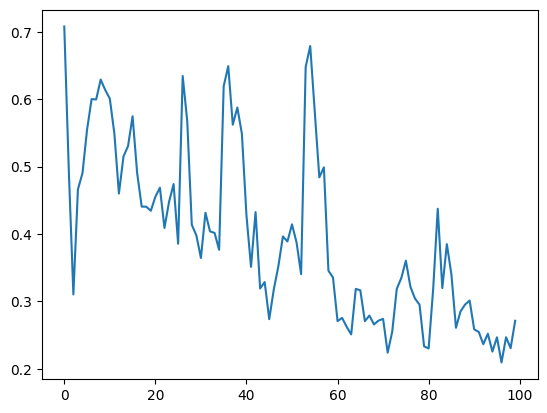

In [14]:
plt.plot(training_loss)

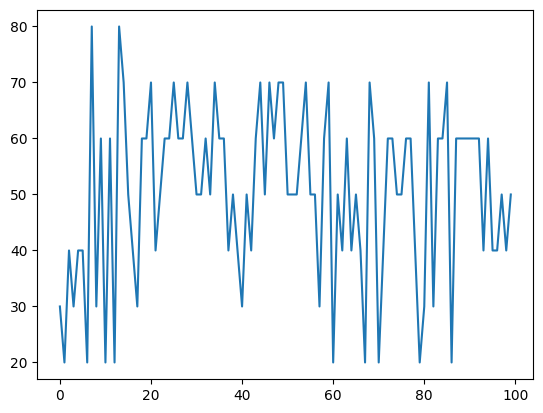

In [20]:
plt.plot(episode_rewards)

# evaluate

In [16]:
test_dataset = AtariDataset(
    "ALE/DemonAttack-v5",
    CAPACITY,
    BATCH_SIZE,
    preprocess,
    render_mode="human",
)

In [17]:
# 玩 5 次
test_rewards = []
for i in range(5):
    print(f"第{i+1}次")
    reward_i = 0
    
    model.eval()
    with torch.no_grad():
        state, _ = test_dataset.init()
        for t in count():
            state = preprocess(state).unsqueeze(0).to(device)
            action = model.get_action(state, 0)
            state, reward, done = test_dataset.get_next_step(action)
            reward_i += reward
            if done or (t > TIMEOUT): 
                test_rewards.append(reward_i)
                break
test_dataset.close()

第1次
第2次
第3次
第4次
第5次


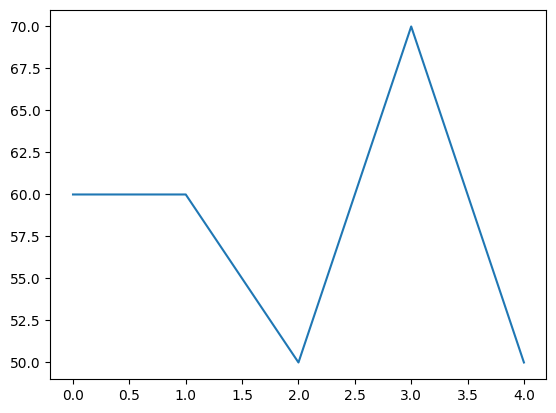

In [21]:
plt.plot(test_rewards)

In [22]:
np.max(test_rewards)

70.0

In [23]:
model_path = artifacts_path / 'atari.demon.attack.pth'

In [24]:
torch.save(model, model_path.as_posix())

In [ ]:
model = torch.load(model_path.as_posix())